<a href="https://colab.research.google.com/github/cristhianaalbert/Poresolution_code/blob/Machine-learning-models/ML_models_OH_all_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup

In [ ]:
!pip install requests==2.23.0 folium==0.2.1 imgaug==0.2.6 pycaret pandas shap 
from pycaret.utils import enable_colab
enable_colab()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.utils import check_metric
from pycaret.regression import *


In [ ]:
def count_alpha_error (a, alpha=0.1):

    '''Calculates the percentage of elements inside a +- alpha range around the true measured value of the ion;
     a = array with final predictions on unseen data;
     alpha = range of error
    '''
    error = a.OHpredicted / a.OH                           #when we are dealing with log scale of ion, the analysis is still in absolute terms;
    count = error[((1-alpha) < error) & (error <(1+alpha))].size
    total = len(error)
    return count/total

Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
#dataset = pd.read_csv(io.StringIO(uploaded['datasetMPKlogOH.csv'].decode('utf-8')))
dataset = pd.read_csv(io.StringIO(uploaded['database_OH_1.csv'].decode('utf-8')),sep=',')

dataset.head()


Saving database_OH_1.csv to database_OH_1.csv


,Index,Matrix_type,waterbinder,aggregatesbinder,Blend,PC,SCM1,SCM1_type,SCM2,SCM2_type,PC_CaO,PC_SiO2,PC_Al2O3,PC_Fe2O3,PC_SO3,PC_MgO,PC_Na2O,PC_K2O,PC_TiO2,PC_P2O5,PC_MnO,PC_CO2,PC_LOI,PC_Amorphous,PC_C3S,PC_C2S,PC_C3A,PC_C4AF,PC_Blaine,PC_BET,SCM1_CaO,SCM1_SiO2,SCM1_Al2O3,SCM1_Fe2O3,SCM1_SO3,SCM1_MgO,SCM1_Na2O,SCM1_K2O,SCM1_TiO2,SCM1_P2O5,SCM1_MnO,SCM1_CO2,SCM1_LOI,SCM1_Amorphous,SCM1_Blaine,SCM1_BET,SCM2_CaO,SCM2_SiO2,SCM2_Al2O3,SCM2_Fe2O3,SCM2_SO3,SCM2_MgO,SCM2_Na2O,SCM2_K2O,SCM2_TiO2,SCM2_P2O5,SCM2_MnO,SCM2_CO2,SCM2_LOI,SCM2_Amorphous,SCM2_Blaine,SCM2_BET,C1_Age_days,C1_Sealed,C1_RH,C1_T,C2_Age_days,C2_Sealed,C2_RH,C2_T,Final_age_days,logOH,OH,Extraction,Pressure_MPa,OH_method
0,9,1,0.5,0.0,2,0.53,0.47,3,0.00,0,62.1,20.37,5.56,2.49,3.54,1.65,0.07,0.65,0.29,0.14,0.05,NaN,1.99,NaN,58.1,14.3,9.2,6.7,5930.0,NaN,41.82,34.87,11.62,0.45,3.13,5.82,0.07,0.47,1.11,0.02,0.27,NaN,1.45,97.5,4540.0,NaN,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.0,1,NaN,20.0,0,0,0.0,0.0,28.0,2.31,204.2,1,250.0,1.0
1,10,1,0.5,0.0,2,0.53,0.47,3,0.00,0,62.1,20.37,5.56,2.49,3.54,1.65,0.07,0.65,0.29,0.14,0.05,NaN,1.99,NaN,58.1,14.3,9.2,6.7,5930.0,NaN,41.82,34.87,11.62,0.45,3.13,5.82,0.07,0.47,1.11,0.02,0.27,NaN,1.45,97.5,4540.0,NaN,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,99.0,1,NaN,20.0,0,0,0.0,0.0,99.0,2.24,173.8,1,250.0,1.0
2,19,1,0.5,0.0,3,0.53,0.38,3,0.09,5,62.1,20.37,5.56,2.49,3.54,1.65,0.07,0.65,0.29,0.14,0.05,NaN,1.99,NaN,58.1,14.3,9.2,6.7,5930.0,NaN,41.82,34.87,11.62,0.45,3.13,5.82,0.07,0.47,1.11,0.02,0.27,NaN,1.45,97.5,4540.0,NaN,53.13,2.0,0.8,0.32,0.07,0.64,NaN,0.1,0.04,0.04,0.03,NaN,42.3,2.0,3280.0,NaN,28.0,1,NaN,20.0,0,0,0.0,0.0,28.0,2.29,195.0,1,250.0,1.0
3,20,1,0.5,0.0,3,0.53,0.38,3,0.09,5,62.1,20.37,5.56,2.49,3.54,1.65,0.07,0.65,0.29,0.14,0.05,NaN,1.99,NaN,58.1,14.3,9.2,6.7,5930.0,NaN,41.82,34.87,11.62,0.45,3.13,5.82,0.07,0.47,1.11,0.02,0.27,NaN,1.45,97.5,4540.0,NaN,53.13,2.0,0.8,0.32,0.07,0.64,NaN,0.1,0.04,0.04,0.03,NaN,42.3,2.0,3280.0,NaN,99.0,1,NaN,20.0,0,0,0.0,0.0,99.0,2.24,173.8,1,250.0,1.0
4,29,1,0.5,0.0,3,0.53,0.38,3,0.09,7,62.1,20.37,5.56,2.49,3.54,1.65,0.07,0.65,0.29,0.14,0.05,NaN,1.99,NaN,58.1,14.3,9.2,6.7,5930.0,NaN,41.82,34.87,11.62,0.45,3.13,5.82,0.07,0.47,1.11,0.02,0.27,NaN,1.45,97.5,4540.0,NaN,0.00,100.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN,28.0,1,NaN,20.0,0,0,0.0,0.0,28.0,2.40,251.2,1,250.0,1.0


Visualize data

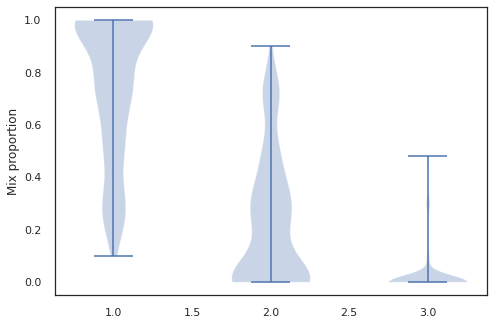

In [ ]:
## combine these different collections into a list
mixproportion = [dataset.PC, dataset.SCM1, dataset.SCM2]
#mixproportion = [dataset.waterbinder]
sns.set_theme(style="white")

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Mix proportion')
#ax.set_xlabel('Sample name') ['PC', 'SCM1', 'SCM2', 'w/b'] LEARN HOW TO SET THESE AXIS
# Create the boxplot
bp = ax.violinplot(mixproportion)
plt.show()

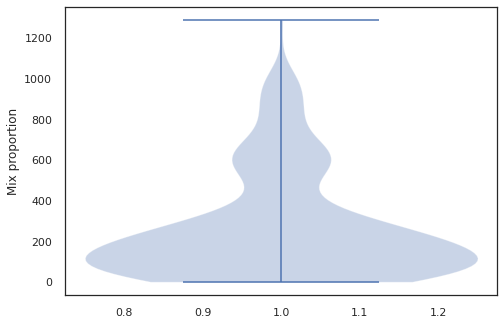

In [ ]:
## combine these different collections into a list
mixproportion = [10**dataset.logOH]
#mixproportion = [dataset.waterbinder]
sns.set_theme(style="white")

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Mix proportion')
#ax.set_xlabel('Sample name') ['PC', 'SCM1', 'SCM2', 'w/b'] LEARN HOW TO SET THESE AXIS
# Create the boxplot
bp = ax.violinplot(mixproportion)
plt.show()

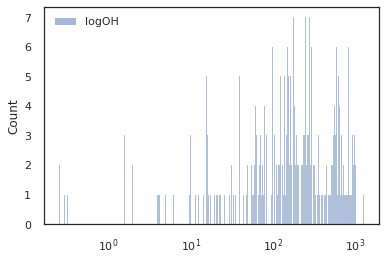

In [ ]:
fig, ax = plt.subplots()
sns.set_theme(style="white")
#sns.set_palette(sns.color_palette('Paired'))
mixproportion = [10**dataset.logOH]
sns.histplot(data=mixproportion, binwidth=0.01, log_scale=True,color='r', legend='OH')
#ax1.set_ylim(0, 30)
#plt.setp(ax, xticks=[10,100,1000])


In [ ]:
display(dataset.shape)
dataset.describe()


(327, 76)

,Index,Matrix_type,waterbinder,aggregatesbinder,Blend,PC,SCM1,SCM1_type,SCM2,SCM2_type,PC_CaO,PC_SiO2,PC_Al2O3,PC_Fe2O3,PC_SO3,PC_MgO,PC_Na2O,PC_K2O,PC_TiO2,PC_P2O5,PC_MnO,PC_CO2,PC_LOI,PC_Amorphous,PC_C3S,PC_C2S,PC_C3A,PC_C4AF,PC_Blaine,PC_BET,SCM1_CaO,SCM1_SiO2,SCM1_Al2O3,SCM1_Fe2O3,SCM1_SO3,SCM1_MgO,SCM1_Na2O,SCM1_K2O,SCM1_TiO2,SCM1_P2O5,SCM1_MnO,SCM1_CO2,SCM1_LOI,SCM1_Amorphous,SCM1_Blaine,SCM1_BET,SCM2_CaO,SCM2_SiO2,SCM2_Al2O3,SCM2_Fe2O3,SCM2_SO3,SCM2_MgO,SCM2_Na2O,SCM2_K2O,SCM2_TiO2,SCM2_P2O5,SCM2_MnO,SCM2_CO2,SCM2_LOI,SCM2_Amorphous,SCM2_Blaine,SCM2_BET,C1_Age_days,C1_Sealed,C1_RH,C1_T,C2_Age_days,C2_Sealed,C2_RH,C2_T,Final_age_days,logOH,OH,Extraction,Pressure_MPa,OH_method
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,316.000000,316.000000,320.000000,320.000000,320.000000,291.000000,287.000000,300.000000,140.000000,126.000000,89.000000,84.000000,251.000000,0.0,247.000000,247.000000,247.000000,247.000000,120.000000,0.0,309.000000,304.000000,309.000000,304.000000,296.000000,289.000000,284.00000,296.000000,200.000000,188.000000,154.000000,134.000000,273.00000,129.000000,150.000000,117.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,323.000000,327.000000,315.000000,303.000000,315.000000,309.0,325.000000,303.000000,301.000000,297.0,327.000000,327.000000,97.000000,268.000000,327.000000,327.000000,315.000000,296.000000,327.000000,327.000000,327.000000,327.000000,171.000000,311.000000
mean,505.110092,1.097859,0.490642,0.259939,1.770642,0.751713,0.225474,1.348624,0.023119,0.311927,62.474146,19.861646,4.721563,3.051719,3.777375,2.021134,0.247805,0.629500,0.151571,0.065952,0.017303,0.301786,2.188685,NaN,59.475425,14.413482,7.472794,9.028016,4113.416667,NaN,11.087696,36.553322,7.901612,2.404908,0.608784,1.895564,0.43769,0.524595,0.286050,0.052979,0.077597,0.951493,1.85652,12.196899,1260.400000,7104.273504,2.109358,4.297859,1.340673,0.235902,0.031193,0.324037,0.025263,0.136086,0.017397,0.000528,0.005714,0.0,0.601477,0.026403,43.588040,0.0,148.990826,0.877676,92.010309,22.458955,28.519878,0.103976,26.984127,7.175676,177.510703,2.146964,272.187339,1.091743,467.859649,1.803859
std,290.661484,0.297580,0.113459,0.870275,0.621196,0.269721,0.245373,1.268129,0.083890,1.024521,5.036117,3.003904,4.493433,1.088516,4.429368,0.936422,0.161268,0.338478,0.117451,0.066971,0.026916,0.635591,2.419314,NaN,8.271390,3.447117,2.739737,2.576050,1039.854948,NaN,19.010685,36.216579,13.533306,4.468984,0.949044,2.937192,1.06551,0.772476,0.431725,0.116627,0.250519,6.311128,6.01535,32.543382,2331.828179,37922.139819,9.263409,15.601763,5.350079,1.021598,0.158836,1.362569,0.119677,0.604849,0.089874,0.004573,0.027329,0.0,4.680250,0.228650,376.216803,0.0,414.716042,0.328162,14.391472,6.435083,65.324100,0.305697,44.458344,15.606481,409.621019,0.643452,264.435718,0.364228,187.725999,0.734046
min,9.000000,1.000000,0.310000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,18.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,NaN,24.730000,7.460000,2.240000,0.970000,2800.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,50.000000,5.000000,0.000000,0.000000,0.000000,0.000000,28.000000,-0.600000,0.300000,1.000000,170.000000,1.000000
25%,215.500000,1.000000,0.420000,0.000000,1.000000,0.530000,0.000000,0.000000,0.000000,0.000000,61.400000,18.660000,3.480000,2.380000,2.290000,1.405000,0.130000,0.350000,0.000000,0.000000,0.000000,0.000000,0.920000,NaN,57.150000,12.210000,5.000000,7.030000,3490.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0

# Modeling

In [ ]:
#defining initial parameters

model_list = ['rf','et']                        #models to be tested;
featsel_list = [1.0]         #feature_selection_threshold for setup - defines how many features will be considered in the model (train/test/prediction);
seed_list = [20, 76,89,140,267,310, 560, 771, 870, 952]                       #seeds for separating data to train/test model and for final predictions; 
sid_list = [22,120, 200, 420, 453, 563, 680, 739, 810, 914]                         #seeds for session id on setup - it defines how cross-validation groups are defined;


kfold_list = [5]                            #numbers of folds for cross-validation - I didn't notice differences on the final results;


alpha1=0.1                                   #error range - used to evaluate +-10% error of prediction around the measured value;
alpha2=0.25                                  #error range - used to evaluate +-25% error of prediction around the measured value;
i=0                                          #initial index;

#tunemodel
tune_on = 1   # 1 to avoid tuning of hyperparameteres; 2 to allow tuning of hyperparameteres;
#These parameters are focused on decision tree methods;
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
tune_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
                        

totalsystems = len(model_list)*len(seed_list)*len(sid_list)*len(featsel_list)*len(kfold_list)*tune_on   #total number of systems considering all variables; times 2 because we have tuned models
totalcolumns = 10                                                                                 #depends on the statistic variables stored on the array "summary" (modelname, ..., R2, RMSE, alpha, etc)
summary = np.zeros((totalsystems, totalcolumns),dtype=object)                                     #array summary mentioned above;

#REMEMBER TO ALTER DEPENDING ON THE SIZE OF DATASET (HOW MANY VARIABLES IT HAS)
estimativefeat = round(int(2*dataset.shape[1]))                        #depends on the number of features in dataset - needs to be a little bit bigger to account for categorical features that are transformed (one hot encoding method)
mostimpfeat = 10                           #number of most important features to be analysed; 15 or 10 seems a reasonable number;



mostimpfeat_value = np.ndarray(shape=(totalsystems, mostimpfeat+1),dtype=object)                      #arrays to store most important features properties; plus 1 is for indexing modelname
mostimpfeat_name = np.zeros(shape=(totalsystems, mostimpfeat+1),dtype=object)
mostimpfeat_test = np.zeros(shape=(totalsystems, 2*mostimpfeat+1),dtype=object)

feat_summary=[]

mostimpfeat_value_full = np.zeros(shape=(totalsystems, estimativefeat),dtype=float)               #arrays to store all features properties
mostimpfeat_name_full = np.zeros(shape=(totalsystems, estimativefeat),dtype=object)
mostimpfeat_full_summary = []


#numfeat = ['SCM2_Amorphous','C1_T','C2_Age_days','C2_T','Pressure_MPa']
ignfeat = ['Index',"OH"]
numfeat = ['waterbinder','aggregatesbinder',
           'PC','SCM1','SCM2','PC_CaO','PC_SiO2','PC_Al2O3', 'PC_Fe2O3', 'PC_SO3', 'PC_MgO', 'PC_Na2O', 'PC_K2O', 
           'PC_TiO2', 'PC_P2O5', 'PC_MnO', 'PC_CO2','PC_LOI', 'PC_Amorphous', 'PC_C3S', 'PC_C2S', 'PC_C3A', 'PC_C4AF','PC_Blaine','PC_BET',
           'SCM1_CaO',	'SCM1_SiO2',	'SCM1_Al2O3',	'SCM1_Fe2O3',	'SCM1_SO3',	'SCM1_MgO',	'SCM1_Na2O',	'SCM1_K2O',	
           'SCM1_TiO2',	'SCM1_P2O5',	'SCM1_MnO',	'SCM1_CO2',	'SCM1_LOI','SCM1_Amorphous','SCM1_Blaine','SCM1_BET',
           'SCM2_CaO',	'SCM2_SiO2',	'SCM2_Al2O3',	'SCM2_Fe2O3',	'SCM2_SO3',	'SCM2_MgO',	'SCM2_Na2O',	'SCM2_K2O',	
           'SCM2_TiO2',	'SCM2_P2O5',	'SCM2_MnO',	'SCM2_CO2',	'SCM2_LOI','SCM2_Amorphous','SCM2_Blaine','SCM2_BET',
           'C1_Age_days','C1_RH','C1_T','C2_Age_days','C2_RH','C2_T','Final_age_days','Pressure_MPa']

#numfeat = ['PC','SCM1','SCM2','PC_Na2O', 'PC_K2O','SCM1_SiO2','SCM2_SiO2','Final_age_days']



for modelname in model_list:                                #running for different models at same loop;
  for p in range(tune_on):                                                                                          #creating a normal and tuned version of the model  %TO AVOID HAVING TUNED MODELS, JUST PUT THE RANGE TO 1 INSTEAD OF 2

    for seed in seed_list:                                                                                      #running for different initial seeds for ramdom state - separation of data to train/test model and for final predictions;
      data = dataset.sample(frac=0.85, random_state=seed)
      data_unseen = dataset.drop(data.index)
      data.reset_index(drop=True, inplace=True)
      data_unseen.reset_index(drop=True, inplace=True)

      for sid in sid_list:                                                                                      #running for different seeds for session id on setup - I believe it defines how cross-validation groups are defined;
        for featsel in featsel_list:                                                                            #running different feature_selection_threshold for setup - defines how many features will be considered in the model (train/test/prediction)

          exp_ps = setup(data = data, target = 'logOH', session_id=sid, normalize = True, 
                        combine_rare_levels = True, rare_level_threshold = 0.05,
                        remove_outliers = True, log_experiment = True, experiment_name = 'poresolution',
                        numeric_features = numfeat, fold=5, ignore_features = ignfeat,
                        feature_selection = True, silent=True, verbose=False)

          for kfold in kfold_list:                          #running for different numbers of folds for cross-validation - I didn't notice differences on the final results;
            #model = create_model(modelname,fold=kfold, n_estimators=80,max_depth=10, verbose=False)
            model = create_model(modelname,n_estimators=80,max_depth=8,fold=kfold,verbose=False)


            if p == 0:                                      #normal model
              model = model           
              modelnameb = modelname

            if p == 1:                                      #tuned model
              model = tune_model(model,fold=kfold, optimize="RMSE", verbose=False)
              modelnameb = 'tuned_'+str(modelname)
            
            aaa=get_logs()

            final_model = finalize_model(model)
            unseen_predictions = predict_model(final_model, data=data_unseen, round=None)
            #test_predictions = predict_model(final_model, data=data_testprediction, round=None)

            #checking accuracy of predictions on unseen data - R2, RMSE, fraction of predictions within alpha error range;
            a = unseen_predictions
            alinear = pd.DataFrame([np.array(10**a.logOH), np.array(10**a.Label)]).T
            alinear.columns=["OH","OHpredicted"]            
            R2 = check_metric(alinear.OH, alinear.OHpredicted, 'R2' )     
            RMSE = check_metric(alinear.OH, alinear.OHpredicted, 'RMSE' )
            erroralpha1 = count_alpha_error(alinear, alpha1)
            erroralpha2 = count_alpha_error(alinear, alpha2)

            nfeat = get_config('X_train').shape[1]           #number of features considered by model - depends on feature_selection_threshold;               

            summary[i,:] = ([modelnameb, seed, sid, kfold, featsel,nfeat, R2, RMSE, erroralpha1, erroralpha2])     #storing all these metrics for each system;


            featimp = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(final_model.feature_importances_)})    #getting the feature importance scores for all systems;
            featimpsort = featimp.sort_values(by='Value', ascending=False)[:mostimpfeat]                                           #organizing feature importance scores in descending order of importance;
            
            feat1 = np.array(featimpsort)[0,0]            #1st to 5th most important feature -> to be displayed during evaluations -> important to checks during runs;
            feat2 = np.array(featimpsort)[1,0]
            feat3 = np.array(featimpsort)[2,0]
            feat4 = np.array(featimpsort)[3,0]
            feat5 = np.array(featimpsort)[4,0]

            mostimpfeat_name[i][0] = modelnameb                                                      #indexing the modelnameb to later identify where did the features get the most contribution
            mostimpfeat_value[i][0] = modelnameb                                                     #indexing the modelnameb to later identify where did the features get the most contribution
            for j in range(mostimpfeat):                                                             #arranging names and values of most important features in two arrays; 
              mostimpfeat_name[i][j+1] = np.array(featimpsort)[j,0]                                  #feature name
              mostimpfeat_value[i][j+1] = np.array(featimpsort)[j,1]/np.array(featimpsort)[0,1]      #feature importance value normalized in relation to most important feature;

            mostimpfeat_test[i][0] = modelnameb                                                      #indexing the modelnameb to later identify where did the features get the most contribution
            for j in range(mostimpfeat):                                                             #arranging names and values of most important features in one array; -> best method;
              mostimpfeat_test[i][2*j+1] = np.array(featimpsort)[j,0]                                #feature name
              mostimpfeat_test[i][2*j+2] = np.array(featimpsort)[j,1]/np.array(featimpsort)[0,1]     #feature importance value normalized in relation to most important feature;



            for k in range(nfeat):                                                                   #arranging names and values of all features in two arrays; 
              mostimpfeat_name_full[i][k] = np.array(featimp)[k,0]                                   #feature name
              mostimpfeat_value_full[i][k] = np.array(featimp)[k,1]/np.array(featimpsort)[0,1]       #feature importance value normalized in relation to most important feature;


            
            for ida, system in enumerate(mostimpfeat_name_full):          #arranging names and values of most important features in one array; -> best method;
              for idb, name in enumerate(system):
                value = mostimpfeat_value_full[ida][idb]
                mostimpfeat_full_summary.append([ida,idb,name,value])      

            i=i+1                                                         #finishing round and going to next one; increasing index number accordingly;

        #print('random_state=',seed,'  session_id=',sid,'  kfold=',kfold,'  R2=', R2, '  RMSE=', RMSE)
            print('''model = {: <10}  random_state = {: <5}  sid = {: <5}  feat_sel_thresh = {: <5}  features = {:<5}  R2 = {:.3f}   RMSE = {:.3f}  Error_a1 = {:.3f}   Error_a2 = {:.3f}   Feat1 = {: <10}   Feat2 = {: <10}   Feat3 = {: <10}     Feat4 = {: <10}   Feat5 = {: <10}'''
                    .format(modelnameb,seed,sid,featsel, nfeat, R2, RMSE,erroralpha1, erroralpha2, feat1, feat2, feat3, feat4, feat5))

pd.DataFrame(mostimpfeat_test).to_csv('mostimpfeat_test.csv',index=False)

table_summary = pd.DataFrame(summary)                 #creating table of statistics for all systems;
table_summary.columns = ['model','random_state','sid','kfold','feat_sel_thresh','features','R2','RMSE','Error_alpha_0.1','Error_alpha_0.25']


columnname = []                                       #creating column names for most important features - we might change the number of selected features 
for i in range(mostimpfeat):
  columnname.append(str(i+1)+'N')
  columnname.append(str(i+1)+'V')

table_mostimpfeat = pd.DataFrame(mostimpfeat_test[:,1:])    #creating table of most important features with their name and value/score;
table_mostimpfeat.columns = columnname

finaltable = pd.concat([table_summary, table_mostimpfeat], axis=1, join='inner')   #combining statistics and most imp features in only one table; it helps on converting it to only one csv file later.
finaltable.to_csv('finaltable.csv')
display(finaltable)

model = rf          random_state = 20     sid = 22     feat_sel_thresh = 1.0    features = 71     R2 = 0.864   RMSE = 118.522  Error_a1 = 0.347   Error_a2 = 0.633   Feat1 = SCM1_SiO2    Feat2 = SCM1         Feat3 = PC_K2O         Feat4 = SCM2         Feat5 = PC_Fe2O3  
model = rf          random_state = 20     sid = 120    feat_sel_thresh = 1.0    features = 76     R2 = 0.856   RMSE = 122.120  Error_a1 = 0.306   Error_a2 = 0.653   Feat1 = SCM1_SiO2    Feat2 = PC           Feat3 = PC_K2O         Feat4 = SCM1         Feat5 = PC_Fe2O3  
model = rf          random_state = 20     sid = 200    feat_sel_thresh = 1.0    features = 71     R2 = 0.867   RMSE = 117.480  Error_a1 = 0.306   Error_a2 = 0.653   Feat1 = SCM1_SiO2    Feat2 = PC           Feat3 = PC_Fe2O3       Feat4 = SCM1         Feat5 = PC_K2O    
model = rf          random_state = 20     sid = 420    feat_sel_thresh = 1.0    features = 78     R2 = 0.865   RMSE = 117.970  Error_a1 = 0.327   Error_a2 = 0.633   Feat1 = SCM1_SiO2    Feat

,model,random_state,sid,kfold,feat_sel_thresh,features,R2,RMSE,Error_alpha_0.1,Error_alpha_0.25,1N,1V,2N,2V,3N,3V,4N,4V,5N,5V,6N,6V,7N,7V,8N,8V,9N,9V,10N,10V
0,rf,20,22,5,1,71,0.8641,118.522,0.346939,0.632653,SCM1_SiO2,1,SCM1,0.497189,PC_K2O,0.235291,SCM2,0.127816,PC_Fe2O3,0.113478,PC_Al2O3,0.0570508,PC_C2S,0.0463235,PC_Na2O,0.0268708,SCM2_SiO2,0.0256581,SCM1_LOI,0.0234865
1,rf,20,120,5,1,76,0.8557,122.12,0.306122,0.653061,SCM1_SiO2,1,PC,0.352672,PC_K2O,0.233521,SCM1,0.20972,PC_Fe2O3,0.198372,PC_Al2O3,0.0613658,PC_C2S,0.0469051,PC_LOI,0.0375991,OH_method_2.0,0.0284997,SCM1_type_1,0.02493
2,rf,20,200,5,1,71,0.8665,117.48,0.306122,0.653061,SCM1_SiO2,1,PC,0.330367,PC_Fe2O3,0.248219,SCM1,0.243236,PC_K2O,0.241847,SCM2,0.0984528,PC_Al2O3,0.0878641,PC_C2S,0.0546534,PC_TiO2,0.0367309,OH_method_2.0,0.0267868
3,rf,20,420,5,1,78,0.8653,117.97,0.326531,0.632653,SCM1_SiO2,1,PC,0.300938,PC_K2O,0.231671,SCM1,0.226009,PC_Fe2O3,0.131821,PC_Al2O3,0.0656153,PC_C2S,0.0416705,SCM2,0.0398742,OH_method_2.0,0.0257852,SCM1_LOI,0.0244238
4,rf,20,453,5,1,80,0.8688,116.436,0.367347,0.612245,SCM1_SiO2,1,PC,0.49416,PC_K2O,0.253215,PC_Fe2O3,0.0964618,PC_Al2O3,0.0802256,SCM2,0.0776607,PC_C2S,0.0441987,PC_LOI,0.0317849,PC_Na2O,0.0256723,OH_method_2.0,0.0232788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,et,952,563,5,1,80,0.9494,68.8914,0.326531,0.612245,SCM1_type_1,1,SCM1_SiO2,0.961527,SCM1,0.567665,PC,0.464547,PC_K2O,0.261903,C2_RH,0.134639,PC_CO2,0.112353,PC_Na2O,0.103841,PC_LOI,0.0553127,PC_P2O5,0.050519
196,et,952,680,5,1,72,0.9495,68.781,0.367347,0.632653,SCM1_SiO2,1,SCM1_type_1,0.809719,SCM1,0.531033,PC,0.375358,PC_K2O,0.22677,PC_CO2,0.135726,C2_RH,0.120491,PC_Na2O,0.106806,PC_TiO2,0.0701444,PC_LOI,0.0542538
197,et,952,739,5,1,76,0.9493,68.9165,0.306122,0.632653,SCM1_type_1,1,SCM1_SiO2,0.714692,SCM1,0.541086,PC,0.357201,PC_K2O,0.232139,PC_CO2,0.178298,C2_RH,0.097882,PC_Na2O,0.0885361,SCM2_Fe2O3,0.0506621,PC_LOI,0.0471689
198,et,952,810,5,1,74,0.9484,69.5314,0.346939,0.653061,SCM1_type_1,1,SCM1_SiO2,0.870085,SCM1,0.622388,PC,0.374539,PC_K2O,0.255279,C2_RH,0.118673,PC_CO2,0.0906334,PC_Na2O,0.0880331,PC_TiO2,0.0752596,PC_LOI,0.0632144
